In [1]:
%matplotlib notebook

import numpy as np
from pca import pca
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pickle

In [4]:
with open('embeddings.pickle', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)
love_emb = model.encode('love')
hate_emb = model.encode('hate')
faith_emb = model.encode('faith')
anchor_emb = np.array([love_emb, hate_emb, faith_emb])
data = np.append(data, anchor_emb, axis=0)
print(anchor_emb.shape)
print(data.shape)

(30873, 768)
(3, 768)
(30876, 768)


In [5]:
with open('embeddings.pickle', 'rb') as f:
    data = pickle.load(f)
with open('model.pickle', 'rb') as f:
    nlpmodel = pickle.load(f)
love_emb = nlpmodel.encode('love')
hate_emb = nlpmodel.encode('hate')
faith_emb = nlpmodel.encode('faith')
anchor_emb = np.array([love_emb, hate_emb, faith_emb])
data = np.append(data, anchor_emb, axis=0)
df = pd.DataFrame(data)
model = pca(n_components=3)
redu_dict = model.fit_transform(df)
redu = np.array(redu_dict['PC'])

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [768] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [26]:
redu = np.random.rand(500, 3)

In [16]:
with open('3dinfo.pickle', 'wb') as f:
    pickle.dump(redu, f)

<IPython.core.display.Javascript object>


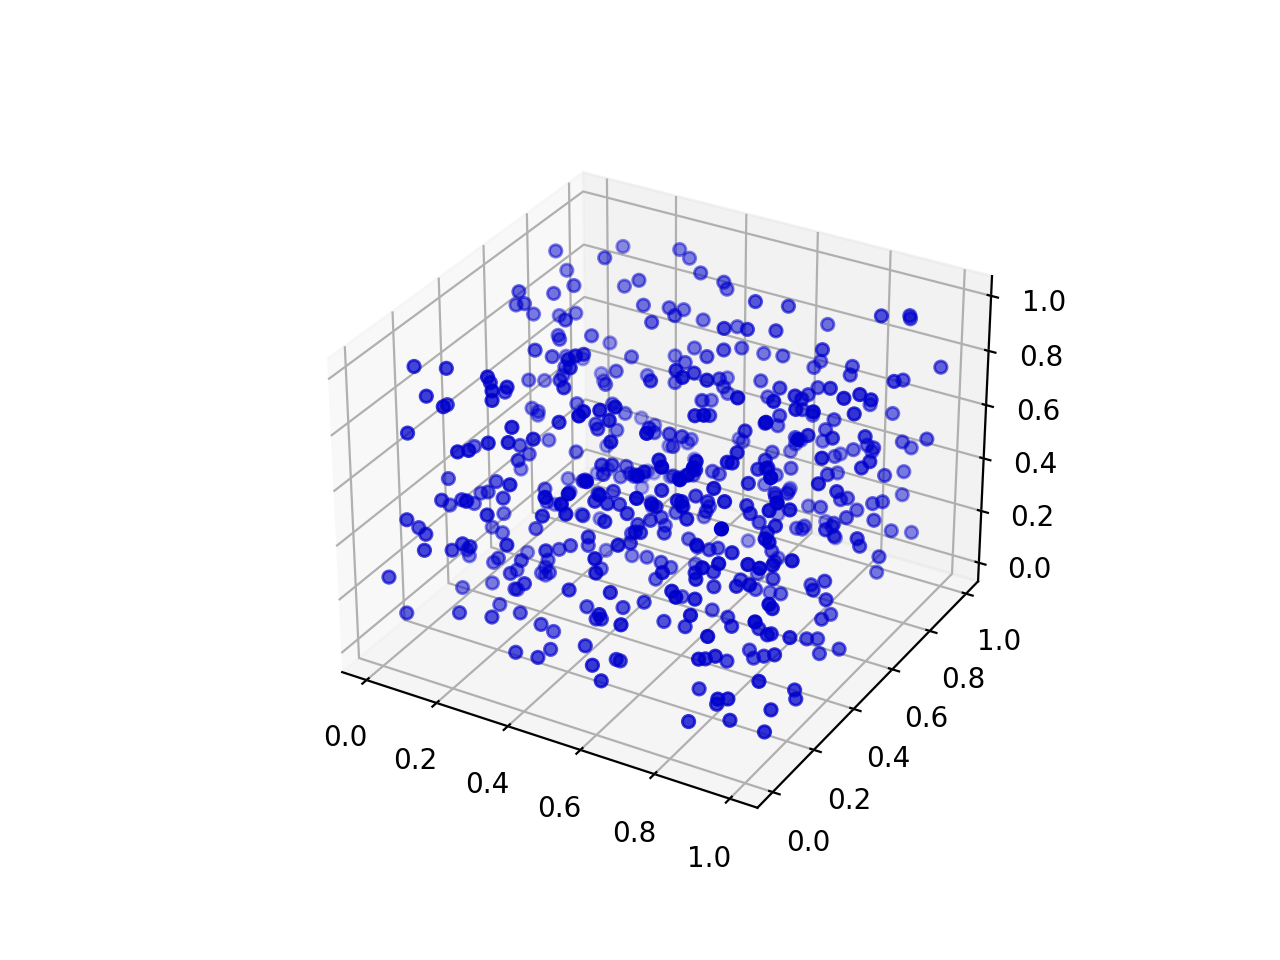

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(redu.T[0], redu.T[1], redu.T[2], c=[[0, 0, 0.8, 1]])

In [9]:
def getProjMatr(anchors):
    A, B, C = anchors
    B = B - A
    C = C - A
    A = A - A
    Z = np.cross(B, C)
    M = np.array([B, Z]).T
    M = np.dot(np.dot(M, np.linalg.inv(np.dot(M.T, M))), M.T)
    return B, C, M, Z

In [10]:
def to2D(vec, x, y):
    return np.array([np.dot(vec, x), np.dot(vec, y)])

In [11]:
a = [2, 4, 5, 2, 5]
b = [2, 6, 2, 3, 4]
print([i for i in zip(a, b)])

[(2, 2), (4, 6), (5, 2), (2, 3), (5, 4)]


In [28]:
anchors = np.array([redu[-3], redu[-2], redu[-1]])
A, B, C = anchors
B, C, M, Z = getProjMatr(anchors)
O = np.zeros(3)
cent = np.array([i - A for i in redu])
print(cent.shape)
flat = np.array([np.dot(M, i) for i in cent])
dist = np.array([np.linalg.norm(centI - flatI) for centI, flatI in zip(cent, flat)])
flatC = flat[200]
x = -(B / np.linalg.norm(B))
y = Z / np.linalg.norm(Z)
proj = np.array([to2D(i, x, y) for i in flat])
projA = proj[-3]
projB = proj[-2]
projC = proj[-1]
projZ = to2D(np.dot(M, Z), x, y)
projAnc = np.array([projA, projB, projC])
print(projAnc)
print(cent.shape)

(500, 3)
[[ 0.00000000e+00  0.00000000e+00]
 [-4.82093181e-01 -8.32667268e-17]
 [-1.32961612e-01  4.16333634e-17]]
(500, 3)


<IPython.core.display.Javascript object>


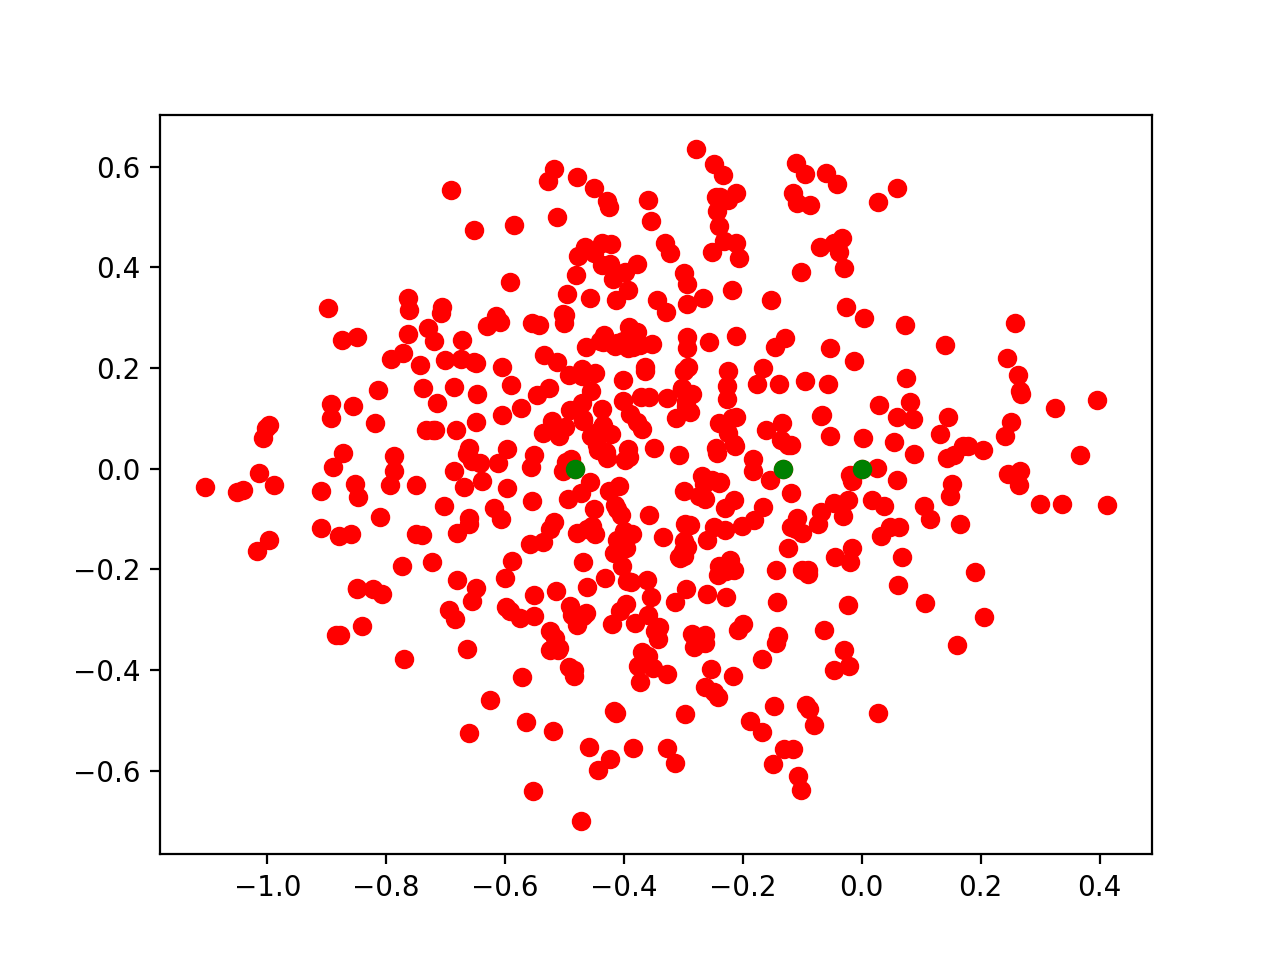

In [29]:
fig = plt.figure()
plt.plot(proj.T[0], proj.T[1], 'ro')
plt.plot(projAnc.T[0], projAnc.T[1], 'go')
plt.show()

<IPython.core.display.Javascript object>


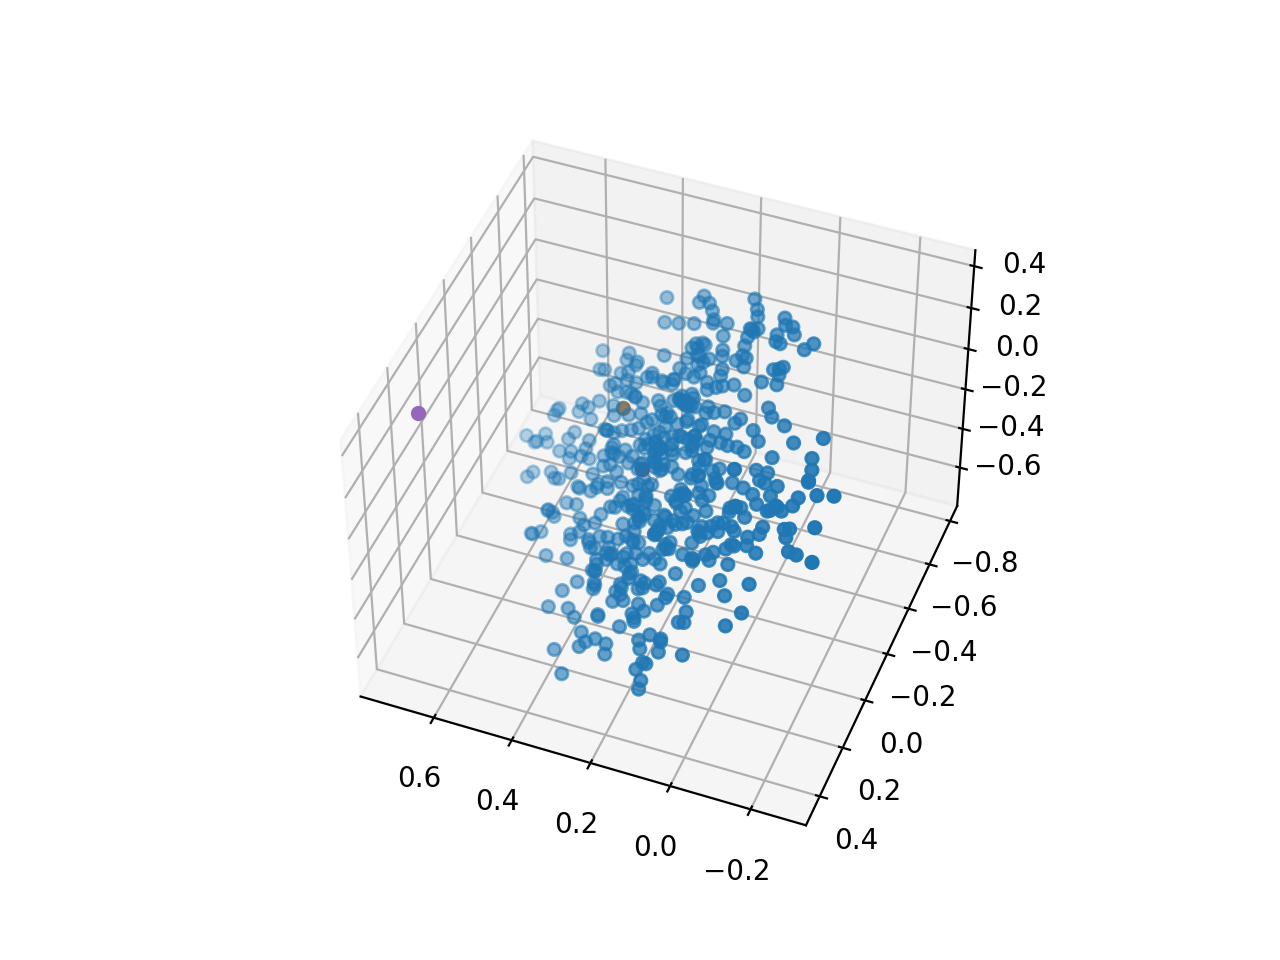

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(flat.T[0], flat.T[1], flat.T[2])
ax.scatter(flatC[0], flatC[1], flatC[2])
# ax.scatter(cent.T[0], cent.T[1], cent.T[2])
ax.scatter(O[0], O[1], O[2])
ax.scatter(B[0], B[1], B[2])
ax.scatter(C[0], C[1], C[2])
# ax.scatter(Z[0], Z[1], Z[2])

In [472]:
print(anchors.T)

[[-5.6858935  5.0478535 -7.361659 ]
 [-6.299201  -4.6862516 -5.1154094]
 [ 2.7088275 -4.951149   2.96169  ]]


In [473]:
print(proj.shape)
print(dist.shape)
flattened = [proj, dist]

(30876, 2)
(30876,)


In [478]:
with open('flattened.pickle', 'wb') as f:
    pickle.dump(flattened, f)

In [514]:
print(proj[-3])
print(to2D(np.dot(M, anchors[-2] - A), x, y))

[0. 0.]
[-1.3284961e+01  2.3841858e-07]
